Levene's Test - Statistic: 2.6943304417369167, P-value: 0.10391131847098642
T-test - T-statistic: 0.7957028838047535, P-value: 0.4281278905942445
T-test: Fail to reject the null hypothesis - There is no significant difference between the means of the two groups.


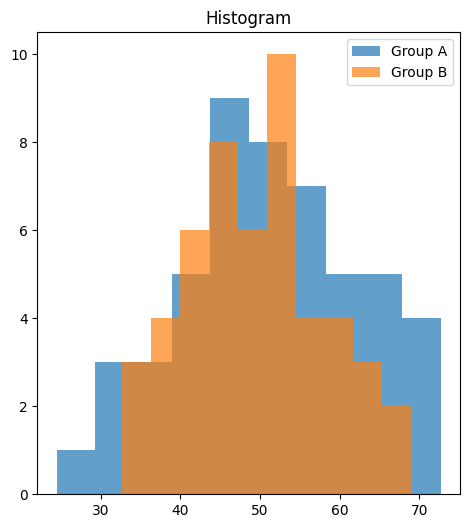

In [5]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)
data1 = pd.DataFrame({
    "group": ["A"] * 50 + ["B"] * 50,
    "values": np.random.normal(loc=50, scale=10, size=100)
})

# Extract data for each group
group_a = data1[data1['group'] == 'A']['values']
group_b = data1[data1['group'] == 'B']['values']

# Plot histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(group_a, bins=10, alpha=0.7, label='Group A')
plt.hist(group_b, bins=10, alpha=0.7, label='Group B')
plt.title('Histogram')
plt.legend()
# Levene's Test for equal variances
levene_stat, levene_p = stats.levene(group_a, group_b)
print(f"Levene's Test - Statistic: {levene_stat}, P-value: {levene_p}")
# Normality check (visualization could be added here)

alpha = .05
# If variances are equal, perform standard t-test
if levene_p > alpha:
    t_stat, p_val = stats.ttest_ind(group_a, group_b)
    print(f"T-test - T-statistic: {t_stat}, P-value: {p_val}")
    if p_val < alpha:
        print("T-test: Reject the null hypothesis - There is a significant difference between the means of the two groups.")
    else:
        print("T-test: Fail to reject the null hypothesis - There is no significant difference between the means of the two groups.") 
else:
    # If variances are unequal, perform Welch's t-test
    welch_t_stat, welch_p_val = stats.ttest_ind(group_a, group_b, equal_var=False)
    print(f"Welch's T-test - T-statistic: {welch_t_stat}, P-value: {welch_p_val}")
    # Welch's t-test interpretation
    if welch_p_val < alpha:
        print("Welch's T-test: Reject the null hypothesis - There is a significant difference between the means of the two groups.")
    else:
        print("Welch's T-test: Fail to reject the null hypothesis - There is no significant difference between the means of the two groups.")

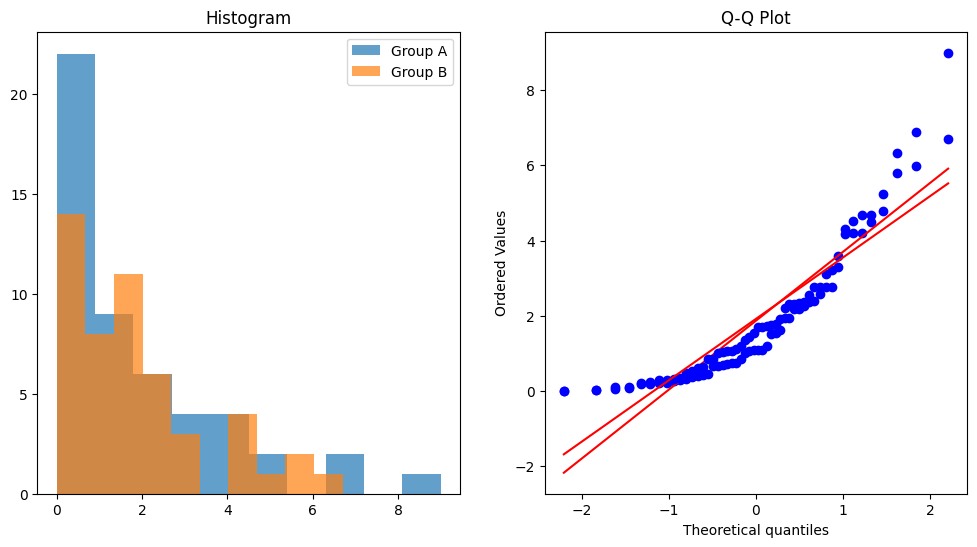

Shapiro-Wilk Test for Group A - Statistic: 0.8234679698944092, P-value: 3.1844701879890636e-06
Shapiro-Wilk Test for Group B - Statistic: 0.8706495761871338, P-value: 5.892478657187894e-05
Levene's Test - Statistic: 0.2894215440023422, P-value: 0.5918111507845343
Mann-Whitney U Test - Statistic: 1157.0, P-value: 0.5236830890423975
Mann-Whitney U Test: Fail to reject the null hypothesis - There is no significant difference between the distributions of the two groups.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate skewed data
np.random.seed(1)
data2 = pd.DataFrame({
    "group": ["A"] * 50 + ["B"] * 50,
    "values": np.random.exponential(scale=2, size=100)
})

# Extract data for each group
group_a = data2[data2['group'] == 'A']['values']
group_b = data2[data2['group'] == 'B']['values']

# Plot histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(group_a, bins=10, alpha=0.7, label='Group A')
plt.hist(group_b, bins=10, alpha=0.7, label='Group B')
plt.title('Histogram')
plt.legend()

# Plot Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(group_a, dist="norm", plot=plt)
stats.probplot(group_b, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Perform Shapiro-Wilk test for normality
shapiro_a_stat, shapiro_a_p = stats.shapiro(group_a)
shapiro_b_stat, shapiro_b_p = stats.shapiro(group_b)
print(f"Shapiro-Wilk Test for Group A - Statistic: {shapiro_a_stat}, P-value: {shapiro_a_p}")
print(f"Shapiro-Wilk Test for Group B - Statistic: {shapiro_b_stat}, P-value: {shapiro_b_p}")

# Perform Levene's test for equal variances
levene_stat, levene_p = stats.levene(group_a, group_b)
print(f"Levene's Test - Statistic: {levene_stat}, P-value: {levene_p}")

# Decide on the test based on normality and variance results
alpha = 0.05
if shapiro_a_p > alpha and shapiro_b_p > alpha:
    # If data is normal, use t-test or Welch's t-test
    if levene_p > alpha:
        t_stat, p_val = stats.ttest_ind(group_a, group_b)
        print(f"T-test - T-statistic: {t_stat}, P-value: {p_val}")
    else:
        welch_t_stat, welch_p_val = stats.ttest_ind(group_a, group_b, equal_var=False)
        print(f"Welch's T-test - T-statistic: {welch_t_stat}, P-value: {welch_p_val}")
else:
    # If data is not normal, use Mann-Whitney U test
    mannwhitney_u_stat, mannwhitney_p_val = stats.mannwhitneyu(group_a, group_b)
    print(f"Mann-Whitney U Test - Statistic: {mannwhitney_u_stat}, P-value: {mannwhitney_p_val}")

# Interpretation
if shapiro_a_p > alpha and shapiro_b_p > alpha:
    if levene_p > alpha:
        if p_val < alpha:
            print("T-test: Reject the null hypothesis - There is a significant difference between the means of the two groups.")
        else:
            print("T-test: Fail to reject the null hypothesis - There is no significant difference between the means of the two groups.")
    else:
        if welch_p_val < alpha:
            print("Welch's T-test: Reject the null hypothesis - There is a significant difference between the means of the two groups.")
        else:
            print("Welch's T-test: Fail to reject the null hypothesis - There is no significant difference between the means of the two groups.")
else:
    if mannwhitney_p_val < alpha:
        print("Mann-Whitney U Test: Reject the null hypothesis - There is a significant difference between the distributions of the two groups.")
    else:
        print("Mann-Whitney U Test: Fail to reject the null hypothesis - There is no significant difference between the distributions of the two groups.")


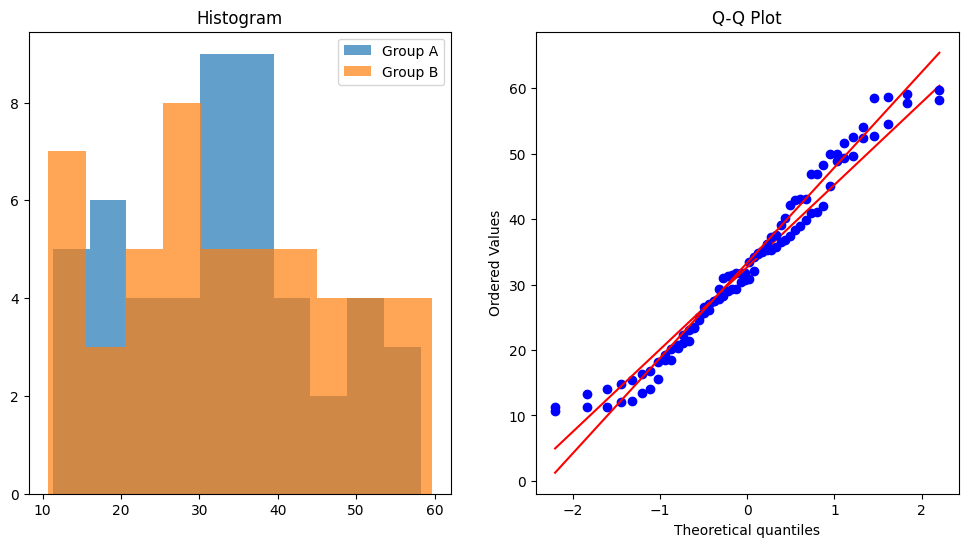

Shapiro-Wilk Test for Group A - Statistic: 0.9690929651260376, P-value: 0.21254906058311462
Shapiro-Wilk Test for Group B - Statistic: 0.9596036672592163, P-value: 0.08555763959884644
Levene's Test - Statistic: 1.6399832113163486, P-value: 0.20335036038237161
T-test - T-statistic: -0.24871350057819025, P-value: 0.8041028807187028
T-test: Fail to reject the null hypothesis - There is no significant difference between the means of the two groups.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate uniformly distributed data
np.random.seed(2)
data3 = pd.DataFrame({
    "group": ["A"] * 50 + ["B"] * 50,
    "values": np.random.uniform(low=10, high=60, size=100)
})

# Extract data for each group
group_a = data3[data3['group'] == 'A']['values']
group_b = data3[data3['group'] == 'B']['values']

# Plot histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(group_a, bins=10, alpha=0.7, label='Group A')
plt.hist(group_b, bins=10, alpha=0.7, label='Group B')
plt.title('Histogram')
plt.legend()

# Plot Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(group_a, dist="norm", plot=plt)
stats.probplot(group_b, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Perform Shapiro-Wilk test for normality
shapiro_a_stat, shapiro_a_p = stats.shapiro(group_a)
shapiro_b_stat, shapiro_b_p = stats.shapiro(group_b)
print(f"Shapiro-Wilk Test for Group A - Statistic: {shapiro_a_stat}, P-value: {shapiro_a_p}")
print(f"Shapiro-Wilk Test for Group B - Statistic: {shapiro_b_stat}, P-value: {shapiro_b_p}")

# Perform Levene's test for equal variances
levene_stat, levene_p = stats.levene(group_a, group_b)
print(f"Levene's Test - Statistic: {levene_stat}, P-value: {levene_p}")

# Decide on the test based on normality and variance results
alpha = 0.05
if shapiro_a_p > alpha and shapiro_b_p > alpha:
    # If data is normal, use t-test or Welch's t-test
    if levene_p > alpha:
        t_stat, p_val = stats.ttest_ind(group_a, group_b)
        print(f"T-test - T-statistic: {t_stat}, P-value: {p_val}")
    else:
        welch_t_stat, welch_p_val = stats.ttest_ind(group_a, group_b, equal_var=False)
        print(f"Welch's T-test - T-statistic: {welch_t_stat}, P-value: {welch_p_val}")
else:
    # If data is not normal, use Mann-Whitney U test
    mannwhitney_u_stat, mannwhitney_p_val = stats.mannwhitneyu(group_a, group_b)
    print(f"Mann-Whitney U Test - Statistic: {mannwhitney_u_stat}, P-value: {mannwhitney_p_val}")

# Interpretation
if shapiro_a_p > alpha and shapiro_b_p > alpha:
    if levene_p > alpha:
        if p_val < alpha:
            print("T-test: Reject the null hypothesis - There is a significant difference between the means of the two groups.")
        else:
            print("T-test: Fail to reject the null hypothesis - There is no significant difference between the means of the two groups.")
    else:
        if welch_p_val < alpha:
            print("Welch's T-test: Reject the null hypothesis - There is a significant difference between the means of the two groups.")
        else:
            print("Welch's T-test: Fail to reject the null hypothesis - There is no significant difference between the means of the two groups.")
else:
    if mannwhitney_p_val < alpha:
        print("Mann-Whitney U Test: Reject the null hypothesis - There is a significant difference between the distributions of the two groups.")
    else:
        print("Mann-Whitney U Test: Fail to reject the null hypothesis - There is no significant difference between the distributions of the two groups.")
